## Импортируем необходимые библиотеки

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Сгенерируем выборку объёма 1000 из хи-квадрат распределённой случайной величины с k=3(df в имплементации)
Плотность вероятности задается уравнением.
$f(x) =
\begin{equation}
\frac{\exp (\frac{ x}{2})x^(\frac{k}{2}-1)}{2^(\frac{k}{2})Г(\frac{k}{2})} 
\end{equation}$ 
$x \ge 0\$

In [48]:
#сгенерим выборку объема 1000 из распределения
df = 3
rv = sts.chi2(df)
sample = rv.rvs(1000)

In [49]:
# расчитаем теоритеческую плотность вероятности для распределения
x = np.linspace(0,15,1000)
pdf = rv.pdf(x)


Text(0.5, 1.0, 'Probability density ')

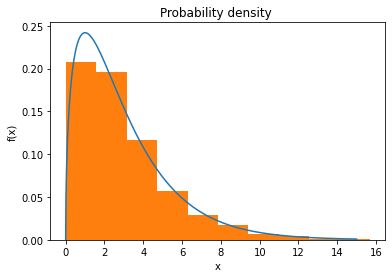

In [53]:
#гистограмма выборки и теоретическая оценка плотности вероятности распределения хи-квадрат 
plt.plot(x, pdf, label = 'theoretical')
plt.hist(sample, density=True, label = 'sample 1000')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density ')


гистограмма выборки совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения

## Распределение выборочных средних
    Cогласно центральной предельной теореме выборочные средние будут приближаться нормальным распределением
 $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$.
    В случае хи-квадрат $\mathbb{E}X = k = 3$ - математическое ожидание, $\mathbb{D}X = 2k = 6$ - дисперсия, c k=3. Pаспределение выборочных средних будет приближаться нормальным распределением $N(\mu = 3, \sigma^2 = \frac{6}{n})$.
    

In [56]:
#функция, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_hist(n):
    # сгенеририм выборочные средние по выборкам объема n
    means=[]
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
        
    #расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 3 # =theretical expectation
    sigma = np.sqrt(6./n) #theretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 15, 1000)
    pdf = norm_rv.pdf(x)
    
    #гистограмма выборочных средних и теоретическая оценка плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5, label = 'theoretical')
    plt.hist(means, density = True, label = 'samples mean')
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title( 'for samples size {}'.format(n))
    plt.show()
    

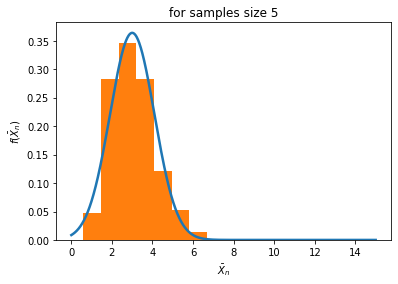

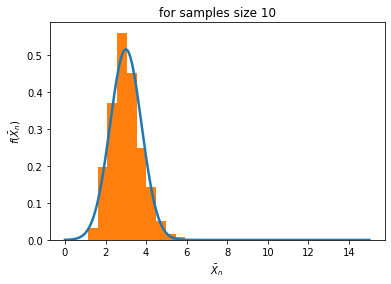

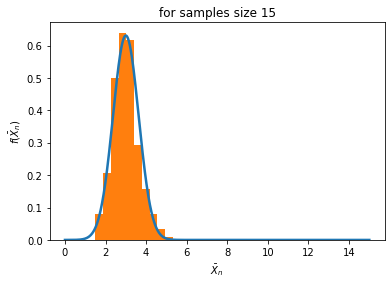

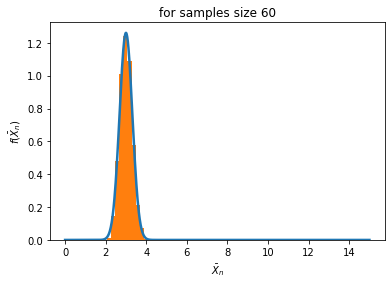

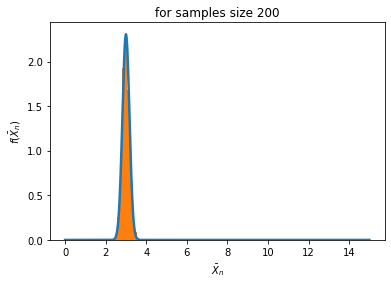

In [57]:
#гистограммы распределений выборочных средних и приближающие их нормальные распределений 
# при различных объемах выборок n
for n in [5, 10, 15, 60, 200]: 
    generate_hist(n)

Вывод: как видим, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=5 распределение несимметрично и совсем не похоже на нормальное, а при n=60 распределение выборочных средних более хорошо соответсвует нормальному. Можно заметить, что с ростом n уменьшается дисперсия распределения выборочных средних.